Import necessary libraries

In [1]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from crackmnist import CrackMNIST

Load CrackMNIST dataset with size S and pixels 28

In [2]:
train_dataset = CrackMNIST(split="train", size="S", pixels=28)
train_dataset.description

'CrackMNIST is a dataset of 2-channel DIC images (u_x, u_y displacements) as inputs from fatigue crack growth experiments and corresponding crack tip segmentation masks as targets.'

The dataset contains planar (2D) displacement fields obtained by digital image correlation during fatigue crack growth experiments. The displacement fields are augmented by crops and rotations and interpolated to a regular grid ($28 \times 28$).

In [3]:
print("The input has the shape", train_dataset.images.shape)

The input has the shape (10048, 2, 28, 28)


As targets the dataset contains the corresponding crack tip locations. The crack tip locations are represented as binary masks with the same size as the inputs.

In [4]:
print(train_dataset.targets.shape)

(10048, 28, 28)


Let us visualize some samples from the dataset.

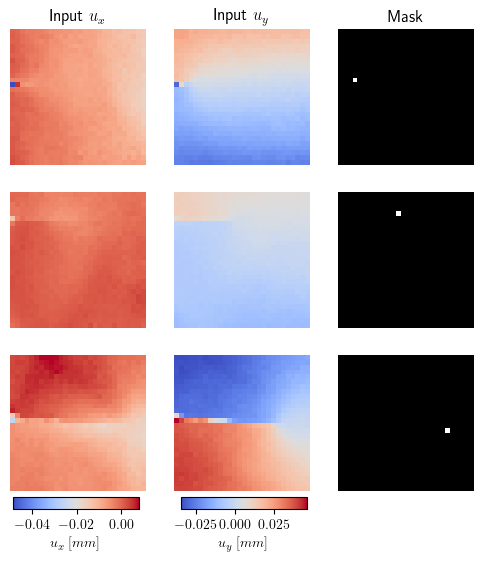

In [5]:
plt.rcParams['text.usetex'] = True  # Enable LaTeX rendering

# Fetch 3 random samples
random_ids = [0, 2000, 4000]
inputs = train_dataset.images[random_ids]
targets = train_dataset.targets[random_ids]


fig, axs = plt.subplots(3, 3, figsize=(6, 6), gridspec_kw={'width_ratios': [1, 1, 1]})

# Normalize each input type separately
vmin_x, vmax_x = inputs[:, 0].min(), inputs[:, 0].max()
vmin_y, vmax_y = inputs[:, 1].min(), inputs[:, 1].max()

norm_x = mcolors.Normalize(vmin=vmin_x, vmax=vmax_x)
norm_y = mcolors.Normalize(vmin=vmin_y, vmax=vmax_y)

for i in range(3):
    im_x = axs[i, 0].imshow(inputs[i, 0], cmap='coolwarm', norm=norm_x)
    if i == 0:
        axs[i, 0].set_title(r"Input $u_x$")
    axs[i, 0].axis('off')

    im_y = axs[i, 1].imshow(inputs[i, 1], cmap='coolwarm', norm=norm_y)
    if i == 0:
        axs[i, 1].set_title(r"Input $u_y$")
    axs[i, 1].axis('off')

    axs[i, 2].imshow(targets[i], cmap='gray')
    if i == 0:
        axs[i, 2].set_title("Mask")
    axs[i, 2].axis('off')


# Create separate axes for colorbars
cbar_ax_x = fig.add_axes([0.13, 0.08, 0.21, 0.02])  # Colorbar for u_x
cbar_ax_y = fig.add_axes([0.41, 0.08, 0.21, 0.02])  # Colorbar for u_y

# Add colorbars
fig.colorbar(im_x, cax=cbar_ax_x, orientation='horizontal', label=r'$u_x\; [mm]$')
fig.colorbar(im_y, cax=cbar_ax_y, orientation='horizontal', label=r'$u_y\; [mm]$')

plt.savefig("../docs/crackmnist_samples.png", dpi=600)
plt.show()

Let us plot the same sample with different resolution (pixels).

In [6]:
train_dataset_28 = CrackMNIST(split="train", size="S", pixels=28)
train_dataset_64 = CrackMNIST(split="train", size="S", pixels=64)
train_dataset_128 = CrackMNIST(split="train", size="S", pixels=128)
train_dataset_256 = CrackMNIST(split="train", size="S", pixels=256)

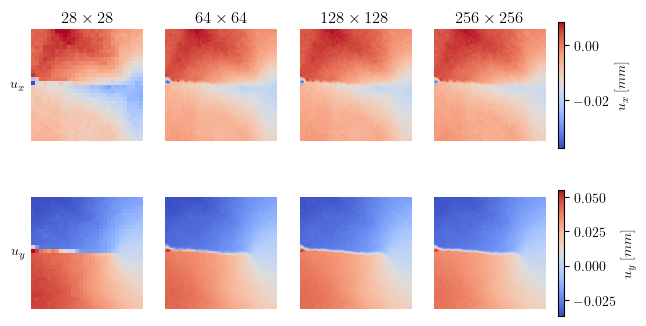

In [7]:
plt.rcParams['text.usetex'] = True  # Enable LaTeX rendering

# Fetch 3 random samples
random_id = 4000
inputs = [dataset.images[random_id] for dataset in [train_dataset_28, train_dataset_64, train_dataset_128, train_dataset_256]]
pixels = [28, 64, 128, 256]

fig, axs = plt.subplots(2, 4, figsize=(8, 4))

for i, (pixel, inp) in enumerate(zip(pixels, inputs)):
    im_x = axs[0, i].imshow(inp[0], cmap='coolwarm')
    axs[0, i].set_title(rf"${pixel} \times {pixel}$")
    axs[0, i].axis('off')

for i, (pixel, inp) in enumerate(zip(pixels, inputs)):
    im_y = axs[1, i].imshow(inp[1], cmap='coolwarm')
    axs[1, i].axis('off')

# turn first column back on, but hide ticks/spines
for r in [0, 1]:
    ax = axs[r, 0]
    ax.axis('on')
    ax.set_xticks([]); ax.set_yticks([])
    for s in ax.spines.values():
        s.set_visible(False)

# Set titles for the first and second row to plot on the left side
axs[0,0].set_ylabel(r"$u_x$", rotation=0,  labelpad=5,
                    ha='right', va='center', rotation_mode='anchor')
axs[1,0].set_ylabel(r"$u_y$", rotation=0,  labelpad=5,
                    ha='right', va='center', rotation_mode='anchor')

# one colorbar per row, placed to the right; CL will reserve space
cbx = fig.colorbar(im_x, ax=axs[0, :], location='right', shrink=0.9, pad=0.02)
cbx.set_label(r"$u_x\; [mm]$")
cby = fig.colorbar(im_y, ax=axs[1, :], location='right', shrink=0.9, pad=0.02)
cby.set_label(r"$u_y\; [mm]$")

plt.savefig("../docs/crackmnist_resolution.png", dpi=600, bbox_inches="tight", pad_inches=0.02)
plt.show()

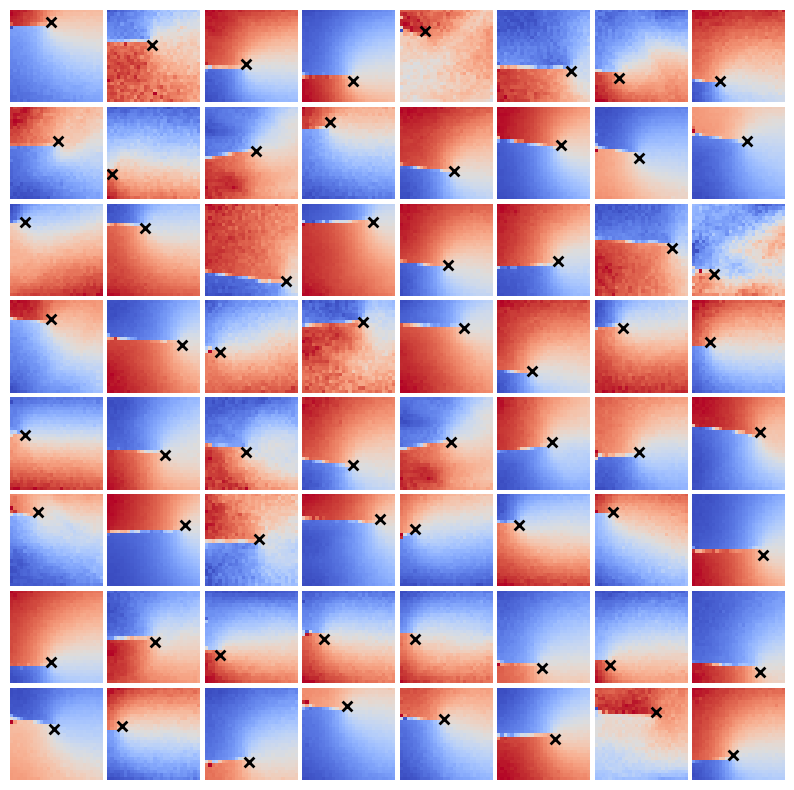

In [8]:
import numpy as np

grid_size = 8
np.random.seed(2)

# Plot a 9x9 grid of samples of resolution 28x28
plt.rcParams['text.usetex'] = True  # Enable LaTeX rendering

fig, axs = plt.subplots(grid_size, grid_size, figsize=(10, 10))
fig.subplots_adjust(hspace=0.05, wspace=0.05)

for i in range(grid_size):
    for j in range(grid_size):
        idx = np.random.randint(0, len(train_dataset_28.images))
        axs[i, j].imshow(train_dataset_28.images[idx, 1], cmap='coolwarm')

        # Add cross at the crack tip location given from the corresponding mask
        mask = train_dataset_28.targets[idx]
        y, x = np.where(mask)
        axs[i, j].scatter(x, y, c='black', marker='x', s=2, linewidths=10)
        axs[i, j].axis('off')

plt.savefig("../docs/crackmnist_grid.png", dpi=300)
plt.show()

Number of pixels in targets: [np.float64(81.0), np.float64(81.0), np.float64(81.0)]


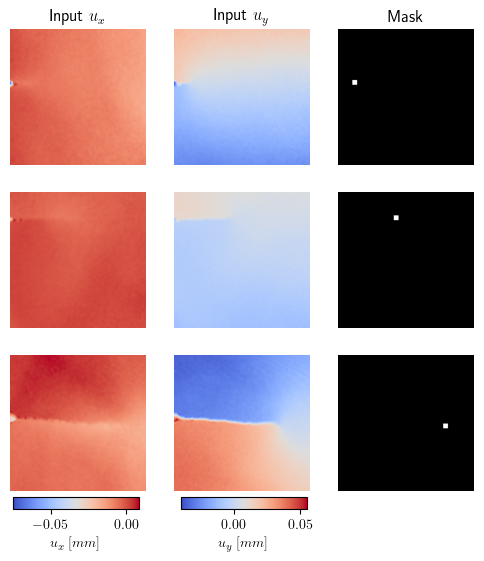

In [9]:
plt.rcParams['text.usetex'] = True  # Enable LaTeX rendering

# Fetch 3 random samples
random_ids = [0, 2000, 4000]
inputs = train_dataset_256.images[random_ids]
targets = train_dataset_256.targets[random_ids]


def enhance_tip(ground_truth, width=1, pixels=128):
    """
    Enhance the crack tip position with width 1.
    This is necessary because otherwise the crack tip position might vanish with the
    transformations 'Resize' or 'RandomRotation' which involve interpolation.
    """
    tip = np.where(ground_truth == 255)
    tip = np.mean(tip, axis=1)  # Get the mean position of the crack tip
    for i in range(-width, width + 1):
        for j in range(-width, width + 1):
            if 0 <= int(tip[0].item() + i) < pixels and 0 <= int(tip[1].item() + j) < pixels:
                ground_truth[int(tip[0].item() + i), int(tip[1].item() + j)] = 255

    return ground_truth


# Enhance crack tip targets with 3x3 grid around crack tip position
targets = [np.array(enhance_tip(target, width=4, pixels=256)) for target in targets]
# count number of pixels in the targets
print("Number of pixels in targets:", [np.sum(target / 255) for target in targets])

# 28: 0
# 64: 1
# 128: 2
# 256: 4


fig, axs = plt.subplots(3, 3, figsize=(6, 6), gridspec_kw={'width_ratios': [1, 1, 1]})

# Normalize each input type separately
vmin_x, vmax_x = inputs[:, 0].min(), inputs[:, 0].max()
vmin_y, vmax_y = inputs[:, 1].min(), inputs[:, 1].max()

norm_x = mcolors.Normalize(vmin=vmin_x, vmax=vmax_x)
norm_y = mcolors.Normalize(vmin=vmin_y, vmax=vmax_y)

for i in range(3):
    im_x = axs[i, 0].imshow(inputs[i, 0], cmap='coolwarm', norm=norm_x)
    if i == 0:
        axs[i, 0].set_title(r"Input $u_x$")
    axs[i, 0].axis('off')

    im_y = axs[i, 1].imshow(inputs[i, 1], cmap='coolwarm', norm=norm_y)
    if i == 0:
        axs[i, 1].set_title(r"Input $u_y$")
    axs[i, 1].axis('off')

    axs[i, 2].imshow(targets[i], cmap='gray')
    if i == 0:
        axs[i, 2].set_title("Mask")
    axs[i, 2].axis('off')


# Create separate axes for colorbars
cbar_ax_x = fig.add_axes([0.13, 0.08, 0.21, 0.02])  # Colorbar for u_x
cbar_ax_y = fig.add_axes([0.41, 0.08, 0.21, 0.02])  # Colorbar for u_y

# Add colorbars
fig.colorbar(im_x, cax=cbar_ax_x, orientation='horizontal', label=r'$u_x\; [mm]$')
fig.colorbar(im_y, cax=cbar_ax_y, orientation='horizontal', label=r'$u_y\; [mm]$')

#plt.savefig("../docs/crackmnist_samples.png", dpi=600)
plt.show()

In [10]:
inp, tar = train_dataset_28[np.asarray([0, 2000, 4000])]

In [11]:
inp.shape

(3, 2, 28, 28)

In [12]:
tar.shape

(3, 28, 28)

In [13]:
meta = train_dataset_28.get_metadata(0)
meta

{'experiment': 'MT160_2024_LT_1',
 'material': 'AA2024 (rolled)',
 'specimen_type': 'MT160',
 'thickness_mm': 2,
 'orientation': 'LT',
 'R': 0.1,
 'side': 'right'}

In [14]:
forces = train_dataset_28.get_forces([0, 2000, 4000])
forces

[15001.5830078125, 3299.982421875, 6000.28125]

In [15]:
augs = train_dataset_28.get_augmentations([0, 2000, 4000])
augs

[{'shift': (1.7665165662765503, -5.800047874450684),
  'rotation': -3.844322443008423,
  'vertical_flip': True},
 {'shift': (1.948043704032898, -17.8963680267334),
  'rotation': -2.3301687240600586,
  'vertical_flip': True},
 {'shift': (0.8274005651473999, 2.369938373565674),
  'rotation': -4.7819905281066895,
  'vertical_flip': False}]

In [16]:
train_sifs = CrackMNIST(split="train", size="S", pixels=28, task="SIF_regression")

In [17]:
train_sifs.description

'CrackMNIST is a dataset of 2-channel DIC images (u_x, u_y displacements) as inputs from fatigue crack growth experiments with corresponding stress intensity factors (SIFs) (K_I, K_II, T-Stress) as targets.'

In [18]:
inp, tar = train_sifs[0]

In [19]:
inp.shape

(2, 28, 28)

In [20]:
tar.shape

(3,)